Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file and display the variables names.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()
resp.columns

Index([u'caseid', u'rscrinf', u'rdormres', u'rostscrn', u'rscreenhisp',
       u'rscreenrace', u'age_a', u'age_r', u'cmbirth', u'agescrn',
       ...
       u'pubassis_i', u'basewgt', u'adj_mod_basewgt', u'finalwgt', u'secu_r',
       u'sest', u'cmintvw', u'cmlstyr', u'screentime', u'intvlngth'],
      dtype='object', length=3087)

Make a histogram of <tt>totincr</tt> the total income for the respondent's family.  To interpret the codes see the [codebook](http://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=MALE&section=R&subSec=7958&srtLabel=609776).

In [2]:
import thinkstats2
hist = thinkstats2.Hist(resp.totincr)
print type(hist)

<class 'thinkstats2.Hist'>


Display the histogram.

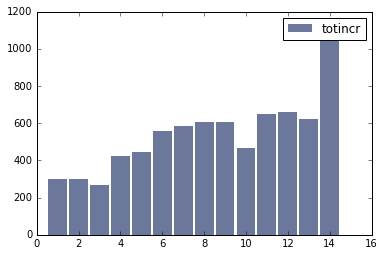

In [3]:
import thinkplot
thinkplot.Hist(hist, label='totincr')
thinkplot.Show()

Make a histogram of <tt>age_r</tt>, the respondent's age at the time of interview.

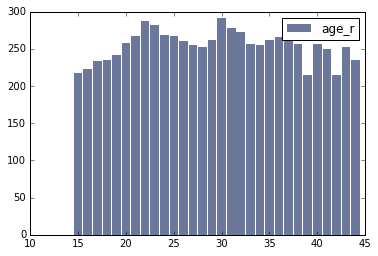

In [4]:
hist = thinkstats2.Hist(resp.age_r)
thinkplot.Hist(hist, label='age_r')
thinkplot.Show()

Make a histogram of <tt>numfmhh</tt>, the number of people in the respondent's household.

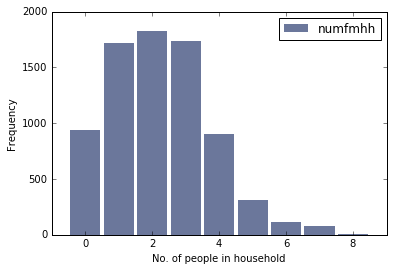

In [5]:
hist = thinkstats2.Hist(resp.numfmhh)
thinkplot.Hist(hist, label='numfmhh')
thinkplot.Show(xlabel='No. of people in household', ylabel='Frequency')

The mode is 2 and the distribution of this histogram looks kind of like a Gaussian distribution with a very flat area in the middle and a shorter tail on the left than on the right.

Make a histogram of <tt>parity</tt>, the number children the respondent has borne.  How would you describe this distribution?

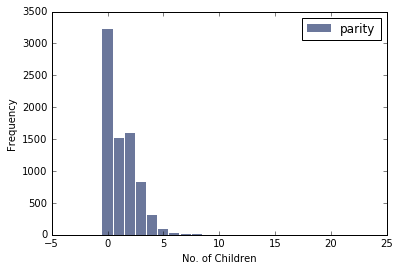

In [6]:
hist = thinkstats2.Hist(resp.parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show(xlabel='No. of Children', ylabel='Frequency')

The mode is 0 and the distribution looks like half of a Gaussian distribution with the top of the peak occuring at the 0. As a result, there is no tail on the left and a tail on the right that continues until about 10. I looked on Wikipedia for a list of probability distributions and it kind of looks like a Poisson distribution with a $\lambda$ of 1.

Use Hist.Largest to find the largest values of <tt>parity</tt>.

In [7]:
print 'Children , Frequency'
for parity, freq in hist.Largest(5):
    print parity, ',', freq

Children , Frequency
22 , 1
16 , 1
10 , 3
9 , 2
8 , 8


Use <tt>totincr</tt> to select the respondents with the highest income.  Compute the distribution of <tt>parity</tt> for just the high income respondents.

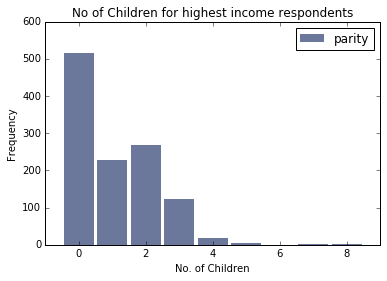

In [8]:
hist = thinkstats2.Hist(resp[resp.totincr == 14].parity)
thinkplot.Hist(hist, label='parity')
thinkplot.Show(xlabel='No. of Children', ylabel='Frequency', title='No of Children for highest income respondents')

The mode is 0 and the distribution for the parity of the highest income respondents also again looks like half of a Gaussian.

Find the largest parities for high income respondents.

In [9]:
print 'Children , Frequency'
for parity, freq in hist.Largest(5):
    print parity, ',', freq

Children , Frequency
8 , 1
7 , 1
5 , 5
4 , 19
3 , 123


Compare the mean <tt>parity</tt> for high income respondents and others.

In [10]:
highest_inc = resp[resp.totincr == 14]
others = resp[resp.totincr != 14]

print highest_inc.parity.mean()
print others.parity.mean()

1.07586206897
1.24957581367


The mean parity for the highest income respondents was around 0.174 lower than all of the other respondents. This means that respondents earning less than \$75,000 have born around 0.174 more children than respondents making over \$75,000 a year.

Investigate any other variables that look interesting.

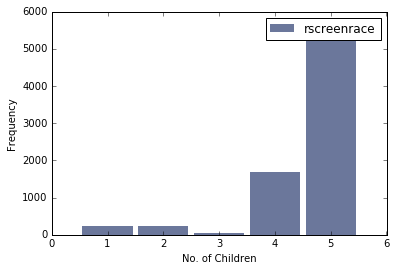

In [11]:
hist = thinkstats2.Hist(resp.rscreenrace)
thinkplot.Hist(hist, label='rscreenrace')
thinkplot.Show(xlabel='No. of Children', ylabel='Frequency')

Above is a histogram of the respondent's race as reported in screening. The first three codes (1, 2, 3) are other race groups. 4 codes a black respondent and 5 codes a white respondent. We know that the NSFG intentionally oversampled minorities but what we see here is that predominantly the respondents are white and the sum of the respondents of all other races is still less than the total number of white respondents. This could indicate that even with the oversampling, there is still a bias in the data towards representing white people more than other races. Or these percentages could work out to be an accurate model of America's population.

### Exercise 4

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length? 

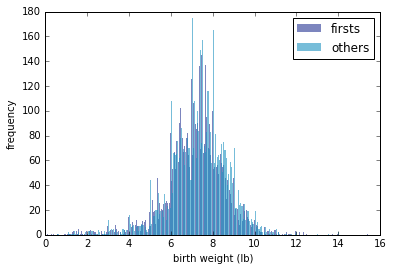

In [12]:
import nsfg
df = nsfg.ReadFemPreg()

live = df[df.outcome == 1]
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

firsts_hist = thinkstats2.Hist(firsts.totalwgt_lb)
others_hist = thinkstats2.Hist(others.totalwgt_lb)

width = 0.05
thinkplot.PrePlot(2)
thinkplot.Hist(firsts_hist, align='right', width=width, label='firsts')
thinkplot.Hist(others_hist, align='left', width=width, label='others')
thinkplot.Show(xlabel='birth weight (lb)', ylabel='frequency')

Above is a histogram of the birth weight in pounds of first babies vs other babies. We see that both first babies and other babies have a Gaussian distribution with the mode of other babies being aorund 7 lb and the mode for first babies being around 7.5 lbs.

In [13]:
import math

print 'Mean totalwgt_lb of first babies ', firsts.totalwgt_lb.mean()
print 'Mean totalwgt_lb of other babies ', others.totalwgt_lb.mean()

def CohenEffectSize(group1, group2):
    diff = group1.mean() - group2.mean()
    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / math.sqrt(pooled_var)
    return d

print 'd ', CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)

Mean totalwgt_lb of first babies  7.20109443044
Mean totalwgt_lb of other babies  7.32585561497
d  -0.0886729270726


The mean weight of first babies in pounds is 7.2 and the mean weight of other babies is 7.33 pounds. This would indicate that first babies are lighter than other babies. However the difference in means is only 0.088 standard deviations so this data isn't really telling about whether or not first babies are lighter than other babies.